# Importing modules and reading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
%matplotlib inline

In [2]:
os.getcwd()
os.chdir("C:\\Users\\super\\Downloads")
data = pd.read_csv('AC_Data.csv')
dfnew = data

Checking number of rows and columns of the data

In [3]:
dfnew.shape

(87840, 19)

# Checking data for missing values

In [4]:
dfnew.rename(columns = {'0':'Date'}, inplace = True)
dfnew = dfnew.set_index('Date')
dfnew.dropna(how = 'all',inplace = True)
dfnew.shape

(51979, 18)

After dropping rows that were entirely blank we are left with 51979 rows

# Sorting the dataframe and adding additional columns

In [5]:
dfnew['Date'] = dfnew.index
dfnew['Day'] = pd.to_datetime(dfnew['Date']).dt.day
dfnew['Time'] = pd.to_datetime(dfnew['Date']).dt.time
del dfnew['Date']
cols = dfnew.columns.tolist()
cols = cols[-2:]+cols[:-2]
dfnew = dfnew[cols]
dfnew.head()

,Day,Time,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,1,00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-08-01 00:02:00,1,00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-08-01 00:04:00,1,00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
2019-08-01 00:06:00,1,00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
2019-08-01 00:08:00,1,00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474


Filling blank cells with 0 (Let us assume the AC was switched off)

In [6]:
dfnew = dfnew.fillna(0)
dfnew.isnull().sum()

Day      0
Time     0
AC 1     0
AC 2     0
AC 3     0
AC 4     0
AC 5     0
AC 6     0
AC 7     0
AC 8     0
AC 9     0
AC 10    0
AC 11    0
AC 12    0
AC 13    0
AC 14    0
AC 15    0
AC 16    0
AC 17    0
AC 18    0
dtype: int64

In [7]:
yo = dfnew.loc[:,cols[2:]].sum()
df2 = pd.DataFrame(yo)
df2.columns = ['Total Power Used']
df2['AC No.'] = df2.index
df2 = df2.reset_index()
del df2['index']
df2

,Total Power Used,AC No.
0,103997.423000,AC 1
1,169113.147946,AC 2
2,112272.957042,AC 3
3,104678.005269,AC 4
4,62151.007653,AC 5
5,110085.431915,AC 6
6,130202.009333,AC 7
7,111388.856216,AC 8
8,139011.024092,AC 9
9,67210.227984,AC 10


In [8]:
df2['Total Power Used'].sum()

2414044.2605554145

Total power used in the month by all AC's is 2414044.2 

# Maximum and minimum used AC's over the month

<AxesSubplot:xlabel='AC No.', ylabel='Total Power Used'>

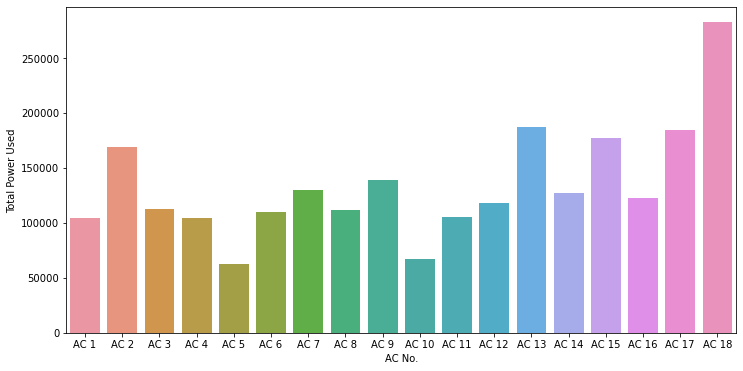

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(x='AC No.',y = 'Total Power Used',data = df2)

We can see that the maximum used AC in the month was AC 18 and minimum used was AC 5

# Using mean values to find average power consumption per hour for each AC

Text(0.5, 42.0, 'AC Number')

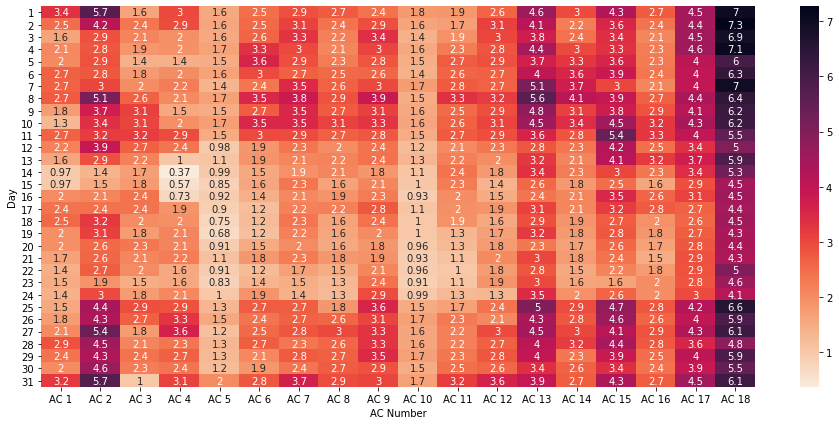

In [10]:
g = dfnew.groupby('Day')
g = g.mean()
g
plt.figure(figsize=(16,7))
sns.heatmap(data = g, annot = True,cmap = sns.cm.rocket_r)
plt.xlabel('AC Number')

# Average daily power consumption for all AC's during the month

In [11]:
g['total daily average power consumption'] = g.sum(axis=1)
g['total daily average power consumption'] = g['total daily average power consumption']*24
g

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,total daily average power consumption
Day,,,,,,,,,,,,,,,,,,,
1,3.354698,5.666557,1.622676,2.998844,1.572166,2.450996,2.882682,2.749257,2.427267,1.811816,1.854327,2.621126,4.583849,2.959248,4.257907,2.746721,4.463905,7.044934,1393.655450
2,2.479837,4.161357,2.350031,2.936225,1.602646,2.529421,3.074107,2.390759,2.921278,1.611765,1.737549,3.118460,4.133965,2.238594,3.563069,2.408169,4.414986,7.272695,1318.677888
3,1.626836,2.884489,2.146224,1.981546,1.554737,2.626612,3.323005,2.202906,3.365408,1.399536,1.940514,3.017792,3.759303,2.418441,3.399979,2.111285,4.495340,6.920786,1228.193744
4,2.067525,2.802474,1.854898,1.950406,1.662327,3.339668,3.002933,2.101074,3.038334,1.559108,2.264620,2.830522,4.417528,3.003195,3.347871,2.266797,4.550697,7.092353,1275.655887
5,2.044747,2.875605,1.399314,1.435356,1.476408,3.588570,2.912139,2.273395,2.819704,1.470796,2.716007,2.888477,3.711709,3.276429,3.584513,2.302416,4.044236,5.965731,1218.853289
6,2.681301,2.768535,1.784620,1.994915,1.645332,2.970530,2.684013,2.539119,2.597190,1.411071,2.628154,2.666104,4.029942,3.563090,3.850476,2.363151,3.986808,6.330388,1259.873744
7,2.652036,3.024493,2.001554,2.245271,1.362363,2.359146,3.479405,2.633541,2.996344,1.743730,2.759154,2.653107,5.132524,3.745134,3.027137,2.106188,4.000527,6.966775,1317.322309
8,2.748194,5.118380,2.633662,2.061208,1.676354,3.539069,3.833999,2.850943,3.863692,1.494590,3.340868,3.179779,5.643091,4.055386,3.908676,2.670162,4.372989,6.396326,1521.296826
9,1.760405,3.741064,3.132262,1.529746,1.494499,2.724226,3.523908,2.742597,3.118052,1.566892,2.499317,2.909763,4.761537,3.111569,3.781297,2.861704,4.124536,6.196237,1333.910719


<AxesSubplot:title={'center':'Average daily power consumption during the month'}, xlabel='Day', ylabel='total daily average power consumption'>

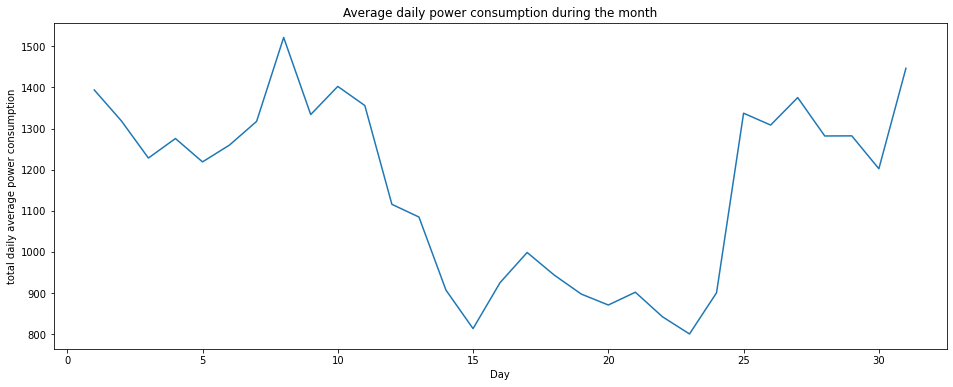

In [12]:
plt.figure(figsize=(16,6))
plt.title('Average daily power consumption during the month')
sns.lineplot(data = g, x = 'Day', y = 'total daily average power consumption')

#  Power consumption pattern for max and min used AC's

Text(0.5, 0, 'Day')

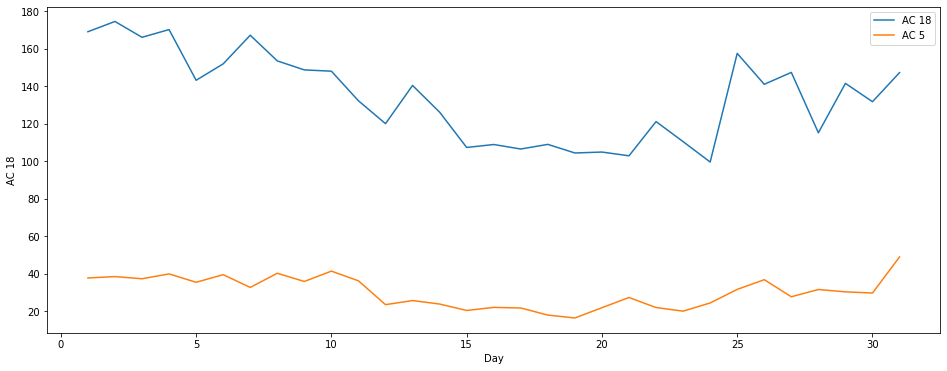

In [13]:
plt.figure(figsize=(16,6))
sns.lineplot(data = g['AC 18']*24,label='AC 18')
sns.lineplot(data = g['AC 5']*24,label='AC 5')
plt.xlabel('Day')

# Scraping data using beautiful soup

In [14]:
import bs4
from bs4 import BeautifulSoup
import requests
import os
url = "https://www.timeanddate.com/weather/india/gurgaon/historic?month=8&year=2019"
 
r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df = df_list[1]
df.columns = df.columns.droplevel(0)
df

,Time,Unnamed: 1_level_1,Temp,Weather,Wind,Unnamed: 5_level_1,Humidity,Barometer,Visibility
0,00.00गुरुवार 1 अगस्त,NaN,30 °C,Fog.,7 km/h,↑,79%,1001 mbar,3 km
1,00.30,NaN,29 °C,Fog.,7 km/h,↑,89%,1001 mbar,3 km
2,01.00,NaN,29 °C,Fog.,7 km/h,↑,89%,1001 mbar,3 km
3,01.30,NaN,29 °C,Fog.,7 km/h,↑,89%,1001 mbar,3 km
4,02.00,NaN,29 °C,Fog.,7 km/h,↑,89%,1001 mbar,3 km
5,02.30,NaN,29 °C,Fog.,7 km/h,↑,89%,1001 mbar,3 km
6,03.00,NaN,29 °C,Fog.,7 km/h,↑,89%,1001 mbar,3 km
7,03.30,NaN,29 °C,Fog.,6 km/h,↑,89%,1001 mbar,3 km
8,04.00,NaN,29 °C,Partly cloudy.,6 km/h,↑,89%,1001 mbar,3 km
9,04.30,NaN,29 °C,Fog.,6 km/h,↑,89%,1001 mbar,3 km
